In [38]:
#05 회귀

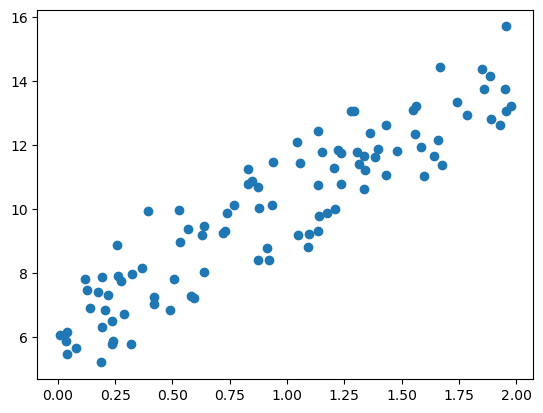

In [39]:
# 임의로 데이터 셋을 만듬
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 시드를 설정함
np.random.seed(0)
# 0과 1사이에서 100,1 모양의 난수 배열을 만듬
X=2*np.random.rand(100,1)
# 여기는 가우시안 분포

y=6+4*X+np.random.randn(100,1)

plt.scatter(X,y)

In [3]:
# 비용함수 만들기 
def get_cost(y,y_pred):
    N=len(y)
    cost=np.sum(np.square(y-y_pred)/N)
    return cost

In [4]:
# 가중치를 업데이트 값을 반환하는 함수

def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
    N=len(y)
    # 원래 w1,w0크기 만큼의 0 배열을 만들고(초기화)
    w1_update=np.zeros_like(w1)
    w0_update=np.zeros_like(w0)
    # 받아온 파라미터 값으로 y_pred를 계산
    y_pred=np.dot(X,w1.T)+w0
    # 오차 계산
    diff=y-y_pred
    # 도트 곱하기위해서 모든 원소가 1인 배열을 만듬
    w0_factors=np.ones((N,1))

    w1_update=(-2/N)*learning_rate*(np.dot(X.T,diff))
    w0_update=-(2/N)*learning_rate*(np.dot(w0_factors.T,diff))
    # 업데이트 값을 반환
    return w1_update,w0_update

In [9]:
# iters주어진 횟수 만큼 반복적으로 가중치 업데이트
def gradient_descent_step(X,y,iters=10000):
    # w0와 w1 초기화
    w0=np.zeros((1,1))
    w1=np.zeros((1,1))


    for ind in range(iters):
        w1_update,w0_update=get_weight_updates(w1,w0,X,y,learning_rate=0.01)
        # 업데이트
        w1=w1-w1_update
        w0=w0-w0_update
    # 최종 업데이트 된 가중치를 반환
    return w1,w0

In [10]:
def get_cost(y,y_pred):
    N=len(y)
    cost=np.sum(np.square(y-y_pred))/N
    return cost


w1,w0=gradient_descent_step(X,y,iters=1000)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0],w0[0,0]))
y_pred=w1[0,0]*X+w0
print('Gredient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1:4.022 w0:6.162
Gredient Descent Total Cost:0.9935


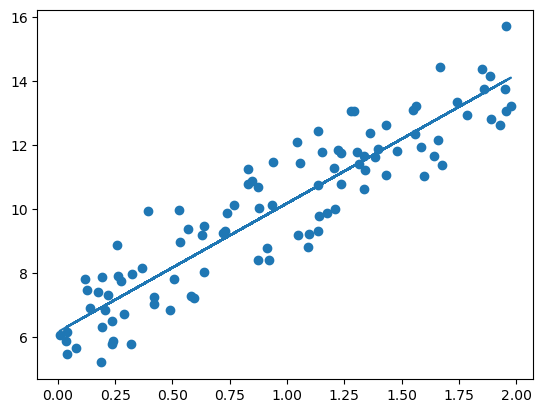

In [11]:
plt.scatter(X,y)
plt.plot(X,y_pred)

In [17]:
# 확률적 경사 하강법
# 모든 학습 데이터에 대해서 파라미터 업데이트를 하는 경사하강법과 달리 확률적 경사하강법은 일부 학습 데이터에 대해서만 파라미터 업데이트를 한다.
def stochastic_gradient_descent(X,y,batch_size=10,iters=1000):
    w0=np.zeros((1,1))
    w1=np.zeros((1,1))

# 이터 만큼 반복을 하는데
    for ind in range(iters):
        # 랜덤 시드를 선택해서 난수를 랜덤하게 추출하고
        np.random.seed(ind)
        # X의 행수만큼의 랜덤하게 섞인 배열을 반환하고
        stochastic_random_index=np.random.permutation(X.shape[0])
        # 그 배열에서 설정한 배치 사이즈 만큼 샘플을 출력하고
        sample_X=X[stochastic_random_index[0:batch_size]]
        sample_y=y[stochastic_random_index[0:batch_size]]
        # 또 거기에서 업데이트를 함
        w1_update,w0_update=get_weight_updates(w1,w0,sample_X,sample_y,learning_rate=0.01)
        w1=w1-w1_update
        w0=w0-w0_update

    return w1,w0



In [19]:
w1,w0=stochastic_gradient_descent(X,y,iters=1000)
print('w1:',round(w1[0,0],3),'w0:',round(w0[0,0],3))
y_pred=w1[0,0]*X+w0

print('stochastic Gradient Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1: 4.028 w0: 6.156
stochastic Gradient Total Cost:0.9937


04 사이킷런 linearRegression을 이용한 보스턴 주택 가격 예측

In [40]:
class sklearn.linear_model.LinearRegression(fit_intercept=True,normalize=False,copy_X=true,n_job-1)

SyntaxError: invalid syntax (296278117.py, line 1)

In [41]:
# 목표는 LinearRegression을 이용해 보스턴 주택 가격 회귀 구현
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

boston=load_boston()

bostonDF=pd.DataFrame(boston.data,columns=boston.feature_names)

# 프라이스라는 칼럼명으로 타겟을 추가함
bostonDF['PRICE']=boston.target
print('Boston 데이터 세트 크기:',bostonDF.shape)
bostonDF.head()


Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [24]:
# 널값은 없고 모두 실수형 자료임
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


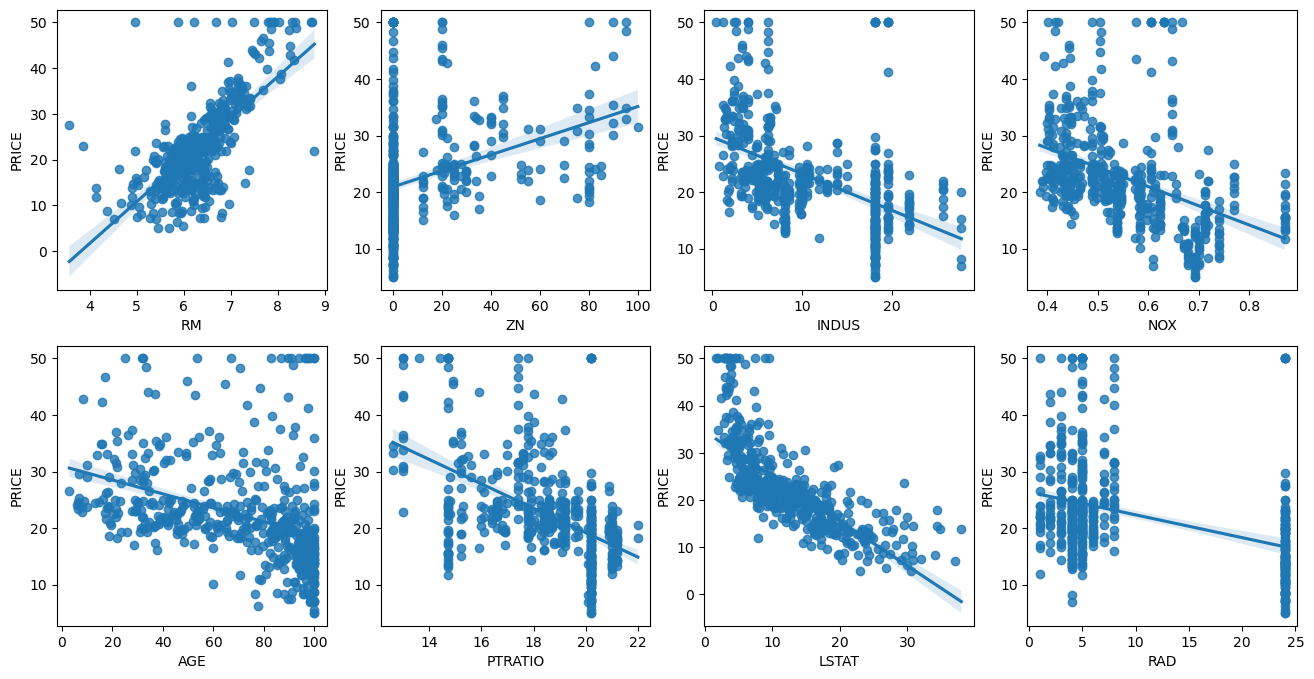

In [28]:
# price와 선형관계가 있는 피쳐들이 있는지를 확인
fig,axs=plt.subplots(figsize=(16,8),ncols=4,nrows=2)
lm_feature=['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i,feature in enumerate(lm_feature):
    row=int(i/4)
    col=i%4
    sns.regplot(x=feature,y='PRICE',data=bostonDF,ax=axs[row][col])

In [42]:
# 보스턴 주택가격 회귀 모델 만들기

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

y_traget=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train,X_test,y_train,y_test=train_test_split(X_data,y_traget,test_size=0.3,random_state=156)

lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds=lr.predict(X_test)
mse=mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)
print('MSE:{0:.3f},RMSE:{1:.3f}'.format(mse,rmse))
print('Varuance score:{0:.3f}'.format(r2_score(y_test,y_preds)))

MSE:17.297,RMSE:4.159
Varuance score:0.757


In [43]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:',np.round(lr.coef_,1))

절편 값: 40.995595172164336
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [44]:
# 회귀 계수랑 항목이랑 매핑 그 다음에 오름 차순
coeff=pd.Series(data=np.round(lr.coef_,1),index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [37]:
# cross val을 해봄
from sklearn.model_selection import cross_val_score
y_traget=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr=LinearRegression()

neg_mse_scores=cross_val_score(lr,X_data,y_traget,scoring='neg_mean_squared_error',cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores:',np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores ',np.round(rmse_scores,2))
print('5 folds의 평균 RMSE:{0:.3f}'.format(avg_rmse))


5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores  [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE:5.829


In [48]:
# 다항 회귀

from sklearn.preprocessing import PolynomialFeatures
import numpy as np

#근데 reshape를 왜해주는 지는 잘모르겠음..
#그냥임 그냥 그렇게 넣은거임
X=np.arange(4).reshape(2,2)
print('일차 다항식 계수 피처:\n',X)
# 그 상태에서 계수를 만듬
poly=PolynomialFeatures(degree=2)
# x1=2,x2=3인 상태에서 2차 다항식을 만듬 1 x1 x2 x1^2 x1x2 x2^2
poly.fit(X)
# 변환
poly_ftr=poly.transform(X)
print('변환된 2차 다항식 게수 피쳐:\n',poly_ftr)

일차 다항식 계수 피처:
 [[0 1]
 [2 3]]
PolynomialFeatures()
변환된 2차 다항식 게수 피쳐:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [51]:
def polynomial_fuc(X):
    y=1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
    return y

X=np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n:',X)
y=polynomial_fuc(X)
print('삼차 다항식 결정값:\n',y)

일차 단항식 계수 feature:
: [[0 1]
 [2 3]]
삼차 다항식 결정값:
 [  5 125]


In [52]:
# 3차 다항식 변환
poly_ftr=PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature:\n',poly_ftr)

model=LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n',np.round(model.coef_,2))
print('Polynomial 회귀 Shape:',model.coef_.shape)

3차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape: (10,)
